# **Exemplo de aplicação de lógica nebulosa (*Fuzzy*)**

> Objetivo do Sistema: *um analista de projetos de uma empresa quer determinar o **risco** de um determinado projeto (saída), dependendo da quantidade de **dinheiro** e de **pessoas** envolvidas no projeto (entradas).*

* **Entrada**

> *Quantidade de Dinheiro*:
   >> Universo (intervalo de valores nítidos/crisp): 0 a 100 

   >> Conjuntos *fuzzy* (valores difusos): **inadequado**, **médio** e **adequado**.

> *Quantidade de Pessoas*:
   >> Universo (intervalo de valores nítidos/crisp): 0 a 100 

   >> Conjuntos *fuzzy* (valores difusos): **baixo** e **alto**.

*   **Saída**

> *Risco*
   >> Universo (intervalo de valores nítidos/crisp): 0 a 100 

   >> Conjuntos *fuzzy* (valores difusos): **pequeno**, **normal** e **alto**.


## Base de conhecimento (regras de decisão)

> **SE** dinheiro é *adequado* **OU** pessoal é *pequeno* **ENTÃO** risco é *pequeno*

> **SE** dinheiro é *médio* **E** pessoal é *alto*, **ENTÃO** risco é *normal*

> **SE** dinheiro é *inadequado*, **ENTÃO** risco é *alto*

---
## Referências
{1} SCIKIT-FUZZY. Scikit-Fuzzy Overview. Disponível em: https://pythonhosted.org/scikit-fuzzy/overview.html.

{2} PISTORI, H. Exemplo de aplicação de lógica nebulosa (fuzzy). Disponível em: https://colab.research.google.com/drive/13nqdB-kHLIMUxemuQJfnV1bqrLzM3hPS.



### **Instalação do Pacote** *skfuzzy*

In [1]:
# Instale o pacote skfuzzy
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 6.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=ab1b7629b67a630659c81401e33bc08109661d1bc5f65e5153f08075fff55a58
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


### Criação das **Variáveis** e de seus respectivos **Termos Lingúisticos**

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variáveis Linguísticas
sujeira = ctrl.Antecedent(np.arange(0,101,1), 'Sujeira')
mancha = ctrl.Antecedent(np.arange(0,101,1), 'Mancha')
tempo = ctrl.Consequent(np.arange(0,61,1), 'Tempo')

# Conjuntos de Termos Linguísticos (membership function tipo trapezoidal)
sujeira['PS'] = fuzz.trapmf(sujeira.universe, [0,0,0,50])
sujeira['MS']      = fuzz.trapmf(sujeira.universe, [0,50,50,100])
sujeira['GS']   = fuzz.trapmf(sujeira.universe, [50,100,100,100])

mancha['SM'] = fuzz.trapmf(mancha.universe, [0,0,0,65])
mancha['MM']  = fuzz.trapmf(mancha.universe, [0,50,50,100])
mancha['GM']  = fuzz.trapmf(mancha.universe, [50,100,100,100])

tempo['MC'] = fuzz.trapmf(tempo.universe, [0,0,0,10])
tempo['C']  = fuzz.trapmf(tempo.universe, [0,10,10,25])
tempo['M']    = fuzz.trapmf(tempo.universe, [10,25,25,40])
tempo['L']    = fuzz.trapmf(tempo.universe, [25,40,40,60])
tempo['ML']    = fuzz.trapmf(tempo.universe, [40,60,60,60])

### Mostrando graficamente as partições dos Universos **DINHEIRO**, **PESSOAL**  e **RISCO**

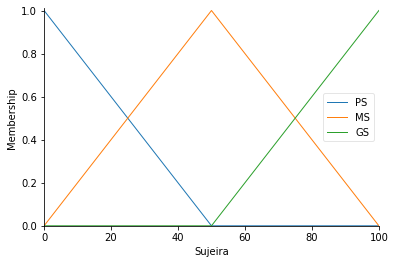

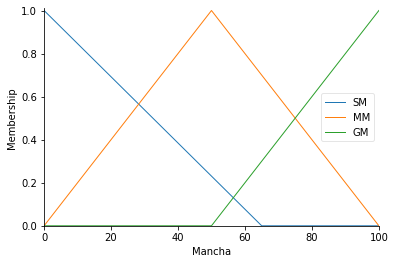

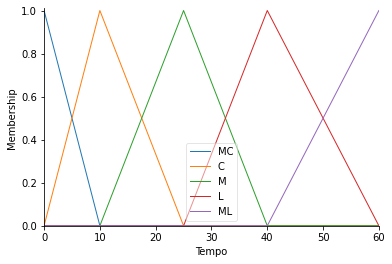

In [3]:
sujeira.view()
mancha.view()
tempo.view()

### Criando a **Base de Regras**

In [4]:
rule0 = ctrl.Rule(sujeira['PS'] & mancha['SM'], tempo['MC'])
rule1 = ctrl.Rule(sujeira['PS'] & mancha['MM'], tempo['M'])
rule2 = ctrl.Rule(sujeira['PS'] & mancha['GM'], tempo['L'])
rule3 = ctrl.Rule(sujeira['MS'] & mancha['SM'], tempo['C'])
rule4 = ctrl.Rule(sujeira['MS'] & mancha['MM'], tempo['M'])
rule5 = ctrl.Rule(sujeira['MS'] & mancha['GM'], tempo['L'])
rule6 = ctrl.Rule(sujeira['GS'] & mancha['SM'], tempo['M'])
rule7 = ctrl.Rule(sujeira['GS'] & mancha['MM'], tempo['L'])
rule8 = ctrl.Rule(sujeira['GS'] & mancha['GM'], tempo['ML'])

### Criando o **Controlador Nebuloso**, definindo os **Entradas** e calculando o **Resultado**

Risco do projeto será de 11.112094395280238


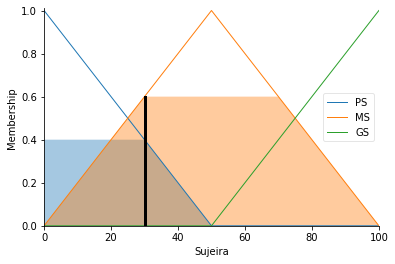

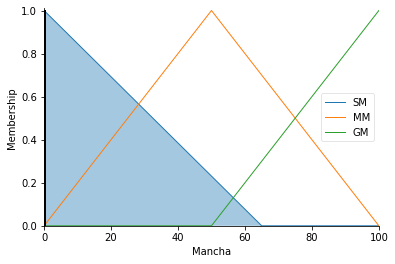

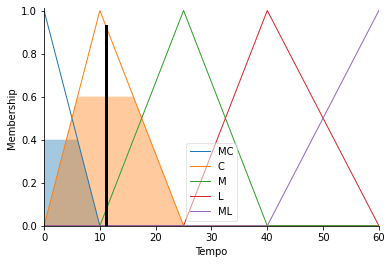

In [7]:
risco_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
risco_simulador = ctrl.ControlSystemSimulation(risco_ctrl)


# Entrando com alguns valores para qualidade da dinheiro e do pessoal

risco_simulador.input['Sujeira'] = 30
risco_simulador.input['Mancha'] = 0

#Computando o resultado
risco_simulador.compute()

"""### Apresentando **Graficamente** o **Resultado**"""

sujeira.view(sim=risco_simulador)
mancha.view(sim=risco_simulador)
tempo.view(sim=risco_simulador)
print("Risco do projeto será de", risco_simulador.output['Tempo'])

### Apresentando **Graficamente** o **Resultado**

Risco do projeto será de 66.81562203340627 %


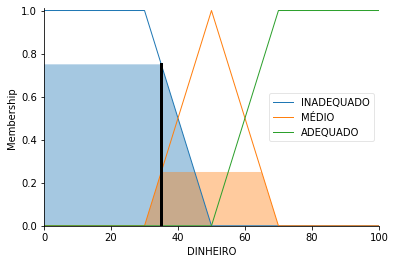

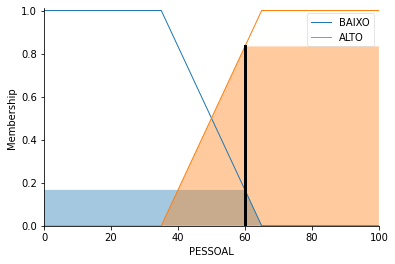

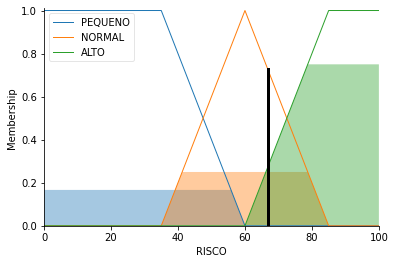

In [ ]:
dinheiro.view(sim=risco_simulador)
pessoal.view(sim=risco_simulador)
risco.view(sim=risco_simulador)
print("Risco do projeto será de", risco_simulador.output['RISCO'], "%")